# Analysis - (Length of Stay > 14 Days)

## Set-up data for the experiments

### Read data matrix

In [1]:
import os
import pandas as pd


datamatrixDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/final/data_matrix.csv''')
datamatrixDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_Red blood cell count_last,labs_Calcium level_last,labs_MCV - Mean corpuscular volume_last,labs_MCHC - Mean corpuscular haemoglobin concentration_last,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last
0,248364,141515,2014-04-04,2014-04-04,0,65.344086,47.924731,105.265233,25.763066,89.777003,...,4.37,9.5,90.4,34.9,31.6,3.8,15.5,97.0,21.0,19.0
1,248364,141515,2014-04-05,2014-04-04,0,68.147368,51.291228,99.049123,23.763889,101.937500,...,3.29,7.6,92.1,34.3,31.6,10.0,16.7,154.0,21.0,14.0
2,248364,141515,2014-04-06,2014-04-04,0,78.180556,57.565972,111.343750,23.731707,109.117021,...,3.34,7.9,91.6,33.7,30.8,12.9,17.3,105.0,22.0,13.0
3,248364,141515,2014-04-07,2014-04-04,0,82.724739,57.696864,123.606272,33.772727,79.000000,...,3.14,8.2,91.4,33.8,30.9,11.7,17.0,123.0,22.0,12.0
4,248364,141515,2014-04-08,2014-04-04,0,75.000000,53.103306,114.359504,30.335664,81.479021,...,2.86,8.0,95.1,33.1,31.5,9.9,17.2,116.0,22.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56232,3521842,3352884,2014-01-29,2014-01-28,0,89.946929,66.934130,137.592436,19.909722,100.312500,...,3.37,8.1,92.0,35.0,32.0,14.4,13.7,62.0,19.0,6.0
56233,3521842,3352884,2014-01-30,2014-01-28,0,73.849266,50.696327,127.106241,21.030612,82.459184,...,3.32,7.8,92.0,35.0,33.0,11.4,14.1,98.0,21.0,3.0
56234,358073,3352922,2015-06-02,2015-06-01,0,78.000000,64.023256,97.302326,17.929821,77.197917,...,4.10,8.0,88.0,33.0,29.0,8.7,17.5,143.0,25.0,7.0
56235,358073,3352922,2015-06-03,2015-06-01,0,106.010242,78.054524,160.937190,19.117647,97.704861,...,3.80,8.5,87.0,33.0,29.0,6.9,17.4,159.0,25.0,7.0


### Read patients file

In [2]:
import os
import pandas as pd


patientDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/patient.csv''')
patientDf

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,...,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,141168,128919,Female,70,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",152.4,15:54:00,...,Direct Admit,1,admit,84.3,85.8,03:50:00,3596,Death,Expired,002-34851
1,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,...,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),Alive,002-33870
2,141179,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,...,ICU to SDU,2,stepdown/other,NaN,60.4,19:20:00,2042,Home,Alive,002-33870
3,141194,128941,Male,68,Caucasian,73,92,"Sepsis, renal/UTI (including bladder)",180.3,18:18:40,...,Floor,1,admit,73.9,76.7,15:31:00,4813,Floor,Alive,002-5276
4,141196,128943,Male,71,Caucasian,67,109,NaN,162.6,20:21:00,...,ICU to SDU,2,stepdown/other,NaN,63.2,22:23:00,1463,Floor,Alive,002-37665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200854,3353235,2743084,Male,50,Caucasian,458,1109,"CHF, congestive heart failure",175.3,04:55:00,...,Emergency Department,1,admit,90.0,99.2,23:18:00,1069,Telemetry,Alive,035-16382
200855,3353237,2743086,Female,79,Caucasian,458,1106,"Embolus, pulmonary",162.6,01:45:00,...,Direct Admit,1,admit,78.4,81.4,23:08:00,1269,Step-Down Unit (SDU),Alive,035-751
200856,3353251,2743099,Male,73,African American,458,1104,Cardiac arrest (with or without respiratory ar...,177.8,12:51:00,...,Emergency Department,1,admit,102.0,96.2,23:16:00,16259,Telemetry,Alive,035-5166
200857,3353254,2743102,Male,81,Caucasian,459,1108,"Bleeding, lower GI",185.4,07:43:00,...,Emergency Department,1,admit,83.9,92.9,19:25:00,431,Step-Down Unit (SDU),Alive,035-19511


### Merge files

In [3]:
dataMergedDf = datamatrixDf.merge(
    patientDf[['patientunitstayid', 'unitdischargeoffset']],
    how='left',
    left_on=['visit_occurrence_id'],
    right_on=['patientunitstayid']
    )
dataMergedDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_MCV - Mean corpuscular volume_last,labs_MCHC - Mean corpuscular haemoglobin concentration_last,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last,patientunitstayid,unitdischargeoffset
0,248364,141515,2014-04-04,2014-04-04,0,65.344086,47.924731,105.265233,25.763066,89.777003,...,90.4,34.9,31.6,3.8,15.5,97.0,21.0,19.0,141515,8882
1,248364,141515,2014-04-05,2014-04-04,0,68.147368,51.291228,99.049123,23.763889,101.937500,...,92.1,34.3,31.6,10.0,16.7,154.0,21.0,14.0,141515,8882
2,248364,141515,2014-04-06,2014-04-04,0,78.180556,57.565972,111.343750,23.731707,109.117021,...,91.6,33.7,30.8,12.9,17.3,105.0,22.0,13.0,141515,8882
3,248364,141515,2014-04-07,2014-04-04,0,82.724739,57.696864,123.606272,33.772727,79.000000,...,91.4,33.8,30.9,11.7,17.0,123.0,22.0,12.0,141515,8882
4,248364,141515,2014-04-08,2014-04-04,0,75.000000,53.103306,114.359504,30.335664,81.479021,...,95.1,33.1,31.5,9.9,17.2,116.0,22.0,14.0,141515,8882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56232,3521842,3352884,2014-01-29,2014-01-28,0,89.946929,66.934130,137.592436,19.909722,100.312500,...,92.0,35.0,32.0,14.4,13.7,62.0,19.0,6.0,3352884,3390
56233,3521842,3352884,2014-01-30,2014-01-28,0,73.849266,50.696327,127.106241,21.030612,82.459184,...,92.0,35.0,33.0,11.4,14.1,98.0,21.0,3.0,3352884,3390
56234,358073,3352922,2015-06-02,2015-06-01,0,78.000000,64.023256,97.302326,17.929821,77.197917,...,88.0,33.0,29.0,8.7,17.5,143.0,25.0,7.0,3352922,5096
56235,358073,3352922,2015-06-03,2015-06-01,0,106.010242,78.054524,160.937190,19.117647,97.704861,...,87.0,33.0,29.0,6.9,17.4,159.0,25.0,7.0,3352922,5096


### Create Length of Stay Targets

In [4]:
dataMergedDf['los_gt_seven_days'] = (dataMergedDf.unitdischargeoffset > (7 * 24 * 60))
dataMergedDf['los_gt_seven_days'].value_counts()

los_gt_seven_days
True     32332
False    23905
Name: count, dtype: int64

In [5]:
dataMergedDf['los_gt_fourteen_days'] = (dataMergedDf.unitdischargeoffset > (14 * 24 * 60))
dataMergedDf['los_gt_fourteen_days'].value_counts()

los_gt_fourteen_days
False    38521
True     17716
Name: count, dtype: int64

### Save files

In [6]:
dataMergedDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last,patientunitstayid,unitdischargeoffset,los_gt_seven_days,los_gt_fourteen_days
0,248364,141515,2014-04-04,2014-04-04,0,65.344086,47.924731,105.265233,25.763066,89.777003,...,31.6,3.8,15.5,97.0,21.0,19.0,141515,8882,False,False
1,248364,141515,2014-04-05,2014-04-04,0,68.147368,51.291228,99.049123,23.763889,101.937500,...,31.6,10.0,16.7,154.0,21.0,14.0,141515,8882,False,False
2,248364,141515,2014-04-06,2014-04-04,0,78.180556,57.565972,111.343750,23.731707,109.117021,...,30.8,12.9,17.3,105.0,22.0,13.0,141515,8882,False,False
3,248364,141515,2014-04-07,2014-04-04,0,82.724739,57.696864,123.606272,33.772727,79.000000,...,30.9,11.7,17.0,123.0,22.0,12.0,141515,8882,False,False
4,248364,141515,2014-04-08,2014-04-04,0,75.000000,53.103306,114.359504,30.335664,81.479021,...,31.5,9.9,17.2,116.0,22.0,14.0,141515,8882,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56232,3521842,3352884,2014-01-29,2014-01-28,0,89.946929,66.934130,137.592436,19.909722,100.312500,...,32.0,14.4,13.7,62.0,19.0,6.0,3352884,3390,False,False
56233,3521842,3352884,2014-01-30,2014-01-28,0,73.849266,50.696327,127.106241,21.030612,82.459184,...,33.0,11.4,14.1,98.0,21.0,3.0,3352884,3390,False,False
56234,358073,3352922,2015-06-02,2015-06-01,0,78.000000,64.023256,97.302326,17.929821,77.197917,...,29.0,8.7,17.5,143.0,25.0,7.0,3352922,5096,False,False
56235,358073,3352922,2015-06-03,2015-06-01,0,106.010242,78.054524,160.937190,19.117647,97.704861,...,29.0,6.9,17.4,159.0,25.0,7.0,3352922,5096,False,False


In [7]:
dataMergedDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix.csv', index=False)

## Perform Cross-Validation

In [8]:
import os


os.system(
    'cd ' + os.environ['EHR_ML_BASE'] + ';'
    +
    '''.venv/bin/python -m ehrml.ensemble.Evaluate ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix.csv -tc "los_gt_fourteen_days" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb ''' + str(0) + ''' -wa ''' + str(600) + ''' -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/results/wb_0_wa_3_los_gt_14_days.json;'''
    )


2023-12-11 09:00:17,190 - EHR-ML - INFO - Parsing command line arguments
2023-12-11 09:00:17,192 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix.csv
2023-12-11 09:00:17,192 - EHR-ML - INFO - args.target_column: los_gt_fourteen_days
2023-12-11 09:00:17,192 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-12-11 09:00:17,192 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-12-11 09:00:17,192 - EHR-ML - INFO - args.anchor_date_column: visit_start_date_adm
2023-12-11 09:00:17,192 - EHR-ML - INFO - args.window_before: 0
2023-12-11 09:00:17,192 - EHR-ML - INFO - args.window_after: 600
2023-12-11 09:00:17,192 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/results/wb_0_wa_3_los_gt_14_days.json
2023-12-11 09:00:18,228 - EHR-ML - INFO - Split data to test 

R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 3: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 4: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:

0

## Time Window Analysis

### Run the analysis

In [4]:
import os


os.system(
    'cd ' + os.environ['EHR_ML_BASE'] + ';'
    +
    '''.venv/bin/python -m ehrml.analysis.TimeWindowAnalysis ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix.csv -tc "los_gt_fourteen_days" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb 0 1 -wa 1 2 3 4 5 6 7 -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/time_window_analysis/los_gt_14_days/;'''
    )


2024-01-03 13:25:02,482 - EHR-ML - INFO - Parsing command line arguments
2024-01-03 13:25:02,483 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix.csv
2024-01-03 13:25:02,483 - EHR-ML - INFO - args.target_column: los_gt_fourteen_days
2024-01-03 13:25:02,483 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2024-01-03 13:25:02,483 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2024-01-03 13:25:02,483 - EHR-ML - INFO - args.anchor_date_column: visit_start_date_adm
2024-01-03 13:25:02,483 - EHR-ML - INFO - args.window_before_list: [0, 1]
2024-01-03 13:25:02,484 - EHR-ML - INFO - args.window_after_list: [1, 2, 3, 4, 5, 6, 7]
2024-01-03 13:25:02,484 - EHR-ML - INFO - args.ensemble: False
2024-01-03 13:25:02,484 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/tim

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 



0

### Read the results

In [6]:
import os
import json

import numpy as np
import pandas as pd


resultsDirPath = os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/time_window_analysis/los_gt_14_days/'''

plotDf = pd.DataFrame(np.zeros([2, 7])*np.nan)
for file in os.listdir(resultsDirPath):
    if file.endswith('.json'):
        ws = int(file.split('.')[0].split('_')[1])
        we = int(file.split('.')[0].split('_')[3]) - 1
        with open(resultsDirPath + '/' + file) as f:
            aurocs = json.load(f)['test_roc_auc']
            mean = sum(aurocs)/len(aurocs)
            plotDf.at[ws, we] = mean
plotDf

,0,1,2,3,4,5,6
0,0.664595,0.696700,0.752705,0.784462,0.818075,0.842589,0.864871
1,0.663272,0.696666,0.747615,0.785275,0.820764,0.842147,0.868053


### Plot

[Text(0.5, -7.277777777777782, 'Window After (days)'),
 Text(45.722222222222214, 0.5, 'Window Before (days)')]

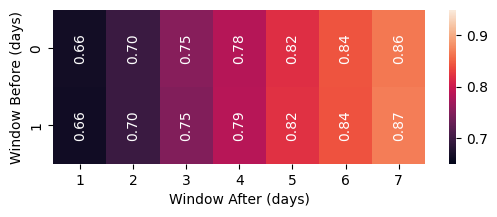

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6, 2))

s = sns.heatmap(
    plotDf,
    annot=True,
    fmt=".2f",
    vmin=0.65,
    vmax=0.95,
    yticklabels=['0', '1'],
    xticklabels=['1', '2', '3', '4', '5', '6', '7'],
    color='#ffa69e',
    annot_kws={'rotation': 90},
)
s.set(xlabel='Window After (days)', ylabel='Window Before (days)')

## Class Ratio Analysis

### Run the analysis

In [1]:
import os


os.system(
    'cd ' + os.environ['EHR_ML_BASE'] + ';'
    +
    '''.venv/bin/python -m ehrml.ensemble.ClassRatioAnalysis ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix.csv -tc "los_gt_fourteen_days" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb ''' + str(0) + ''' -wa ''' + str(8) + ''' -pcp 50 45 40 35 30 25 20 15 10 5 -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/class_ratio_analysis/;'''
    )


2023-12-13 00:39:50,664 - EHR-ML - INFO - Parsing command line arguments
2023-12-13 00:39:50,665 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix.csv
2023-12-13 00:39:50,665 - EHR-ML - INFO - args.target_column: los_gt_fourteen_days
2023-12-13 00:39:50,665 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-12-13 00:39:50,665 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-12-13 00:39:50,665 - EHR-ML - INFO - args.anchor_date_column: visit_start_date_adm
2023-12-13 00:39:50,665 - EHR-ML - INFO - args.window_before: 0
2023-12-13 00:39:50,665 - EHR-ML - INFO - args.window_after: 8
2023-12-13 00:39:50,665 - EHR-ML - INFO - args.positive_class_proportions: ['50', '45', '40', '35', '30', '25', '20', '15', '10', '5']
2023-12-13 00:39:50,665 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/expe

R[write to console]: There were 25 warnings (use warnings() to see them)
R[write to console]: 



0

#### Define data directory

In [1]:
import os


dataDirName = os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/class_ratio_analysis/'''

#### Load results in a DataFrame

In [10]:
import json
from pathlib import Path
import pandas as pd


data = []

for file in os.listdir(dataDirName):
    filePath = Path(dataDirName, file)
    if file.startswith('wb_0_wa_8_ratio_'):
        print('filePath: ', filePath)
        with open(filePath, 'rb') as f:
            results = json.load(f)
            aurocs = results['test_roc_auc']
            accuracies = results['test_accuracy']
            balanced_accuracies = results['test_balanced_accuracy']
            average_precisions = results['test_average_precision']
            f1_scores = results['test_f1']
            mccf1_scores = results['test_mccf1_score']
            data.append(['AUROC', int(file.split('_')[5]), sum(aurocs)/len(aurocs)])
            data.append(['Accuracy', int(file.split('_')[5]), sum(accuracies)/len(accuracies)])
            data.append(['Balanced Accuracy', int(file.split('_')[5]), sum(balanced_accuracies)/len(balanced_accuracies)])
            data.append(['Average Precision', int(file.split('_')[5]), sum(average_precisions)/len(average_precisions)])
            data.append(['F1 Scores', int(file.split('_')[5]), sum(f1_scores)/len(f1_scores)])
            data.append(['MCCF1 Scores', int(file.split('_')[5]), sum(mccf1_scores)/len(mccf1_scores)])
linePlotDf = pd.DataFrame(data, columns=['Metric', 'Ratio', 'Score'])
linePlotDf

filePath:  /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/class_ratio_analysis/wb_0_wa_8_ratio_50_50.json
filePath:  /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/class_ratio_analysis/wb_0_wa_8_ratio_35_65.json
filePath:  /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/class_ratio_analysis/wb_0_wa_8_ratio_32_68.json
filePath:  /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/class_ratio_analysis/wb_0_wa_8_ratio_40_60.json
filePath:  /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/class_ratio_analysis/wb_0_wa_8_ratio_45_55.json


,Metric,Ratio,Score
0,AUROC,50,0.955320
1,Accuracy,50,0.941933
2,Balanced Accuracy,50,0.812081
3,Average Precision,50,0.751134
4,F1 Scores,50,0.688139
5,MCCF1 Scores,50,0.748758
6,AUROC,35,0.897294
7,Accuracy,35,0.915153
8,Balanced Accuracy,35,0.614522
9,Average Precision,35,0.424750


In [14]:
linePlotDf['Ratio'] = 100 - linePlotDf['Ratio']

#### Pivot

In [15]:
linePlotDf.pivot(columns=['Metric'], index=['Ratio'], values=['Score'])

Score                                                          \
Metric     AUROC  Accuracy Average Precision Balanced Accuracy F1 Scores   
Ratio                                                                      
50      0.955320  0.941933          0.751134          0.812081  0.688139   
55      0.946310  0.940571          0.682466          0.780308  0.639449   
60      0.921435  0.923878          0.518067          0.690737  0.476612   
65      0.897294  0.915153          0.424750          0.614522  0.329463   
68      0.886821  0.919898          0.367821          0.587193  0.270834   

                     
Metric MCCF1 Scores  
Ratio                
50         0.748758  
55         0.710509  
60         0.581028  
65         0.465944  
68         0.421715

#### Plot

<Figure size 1200x600 with 0 Axes>

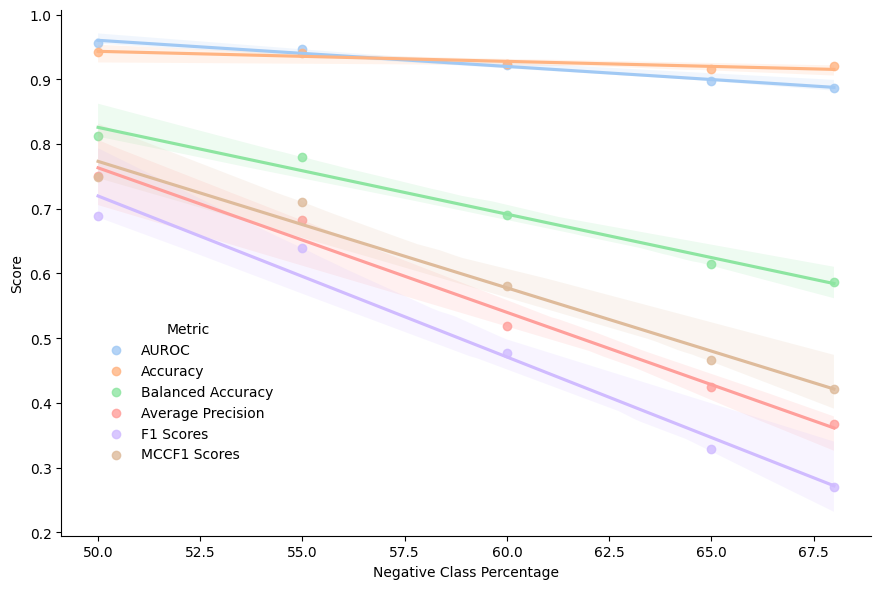

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.lmplot(
    data=linePlotDf,
    x='Ratio',
    y='Score',
    hue='Metric',
    palette=sns.color_palette("pastel"),
    height=6,
    aspect=1.5,
    # lowess=True,
    # scatter_kws={"s": 0},
    )
ax.set(xlabel='Negative Class Percentage')
ax.set(ylabel='Score')
# ax.set_xticklabels(['', '50-50', '60-40', '70-30', '80-20', '90-10', ''])
sns.move_legend(ax, "lower left", bbox_to_anchor=(.1, .2))
plt.show()

## Standardisation Analysis

### Run the analysis

In [5]:
import os


os.system(
    'cd ' + os.environ['EHR_ML_BASE'] + ';'
    +
    '''.venv/bin/python -m ehrml.ensemble.StandardisationAnalysis ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/class_ratio_analysis/data_matrix_ratio_50_50.csv -tc "los_gt_fourteen_days" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb ''' + str(0) + ''' -wa ''' + str(8) + ''' -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/standardisation_analysis/;'''
    )


2023-12-13 12:41:30,532 - EHR-ML - INFO - Parsing command line arguments
2023-12-13 12:41:30,533 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/class_ratio_analysis/data_matrix_ratio_50_50.csv
2023-12-13 12:41:30,533 - EHR-ML - INFO - args.target_column: los_gt_fourteen_days
2023-12-13 12:41:30,533 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-12-13 12:41:30,533 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-12-13 12:41:30,533 - EHR-ML - INFO - args.anchor_date_column: visit_start_date_adm
2023-12-13 12:41:30,533 - EHR-ML - INFO - args.window_before: 0
2023-12-13 12:41:30,533 - EHR-ML - INFO - args.window_after: 8
2023-12-13 12:41:30,533 - EHR-ML - INFO - args.save_dir: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/standardisation_analysis/
2023-12-13 12:41:30,533 - EHR-ML - INFO - Creating ori

R[write to console]: There were 15 warnings (use warnings() to see them)
R[write to console]: 



0

### Read the results

#### Define data directory

In [7]:
import os


dataDirName = os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/standardisation_analysis/'''

#### Load results in a DataFrame

In [11]:
import json
from pathlib import Path
import pandas as pd


data = []

for file in ['wb_0_wa_8_original.json', 'wb_0_wa_8_standardised.json', 'wb_0_wa_8_scaled.json']:
    scoresFile = Path(dataDirName, file)
    if os.path.exists(scoresFile):
        with open(Path(scoresFile), 'rb') as f:
            aurocs = json.load(f)['test_roc_auc']
            for auroc in aurocs:
                data.append([file.split('.')[0].split('_')[4], auroc])
boxPlotDf = pd.DataFrame(data, columns=['Scaling', 'AUROC Scores'])
boxPlotDf

,Scaling,AUROC Scores
0,original,0.959558
1,original,0.937222
2,original,0.950311
3,original,0.954545
4,original,0.974963
5,standardised,0.953520
6,standardised,0.934071
7,standardised,0.951024
8,standardised,0.959621
9,standardised,0.968262


In [12]:
import numpy as np


boxPlotDf.groupby('Scaling').agg(['mean', np.std]).reset_index()

Scaling AUROC Scores          
                        mean       std
0      original     0.955320  0.013757
1        scaled     0.954335  0.014588
2  standardised     0.953300  0.012637

#### Plot

/tmp/ipykernel_616626/1134799658.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels=['No Scaling', 'Standard Scaling', 'Min Max Scaling'])


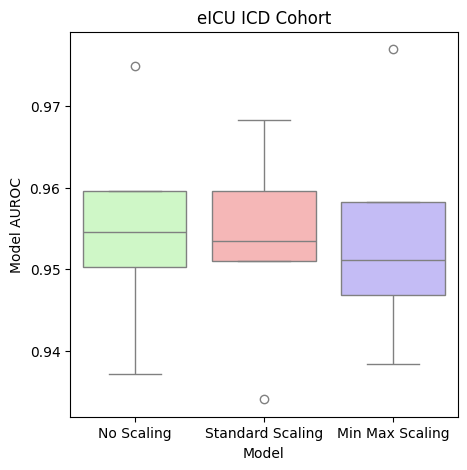

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 5))
ax = sns.boxplot(data=boxPlotDf, x='Scaling', y='AUROC Scores', hue='Scaling', palette=['#caffbf', '#ffadad', '#bdb2ff'])
ax.set(xticklabels=['No Scaling', 'Standard Scaling', 'Min Max Scaling'])
ax.set(xlabel='Model')
ax.set(ylabel='Model AUROC')
ax.set_title('eICU ICD Cohort')
plt.show()

## Sample Size Analysis

### Run the analysis

In [16]:
import os


os.system(
    'cd ' + os.environ['EHR_ML_BASE'] + ';'
    +
    '''.venv/bin/python -m ehrml.ensemble.SampleSizeAnalysis ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/class_ratio_analysis/data_matrix_ratio_50_50.csv -tc "los_gt_fourteen_days" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb ''' + str(0) + ''' -wa ''' + str(8) + ''' -ss 200 400 600 800 1000 1500 2000 2500 3000 4000 5000 6000 7000 8000 8870 -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/sample_size_analysis/;'''
    )


2023-12-13 13:26:08,426 - EHR-ML - INFO - Parsing command line arguments
2023-12-13 13:26:08,428 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/class_ratio_analysis/data_matrix_ratio_50_50.csv
2023-12-13 13:26:08,428 - EHR-ML - INFO - args.target_column: los_gt_fourteen_days
2023-12-13 13:26:08,428 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-12-13 13:26:08,428 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-12-13 13:26:08,428 - EHR-ML - INFO - args.anchor_date_column: visit_start_date_adm
2023-12-13 13:26:08,428 - EHR-ML - INFO - args.window_before: 0
2023-12-13 13:26:08,428 - EHR-ML - INFO - args.window_after: 8
2023-12-13 13:26:08,428 - EHR-ML - INFO - args.sample_size: [200, 400, 600, 800, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000, 7000, 8000, 8870]
2023-12-13 13:26:08,428 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/wor

R[write to console]: Error in ROCR::prediction(predictor, response) : 
  Number of classes is not equal to 2.
ROCR currently supports only evaluation of binary classification tasks.

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 3: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, 

2023-12-13 13:27:40,064 - EHR-ML - INFO - Saving to file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/sample_size_analysis//wb_0_wa_8_sample_200.json
2023-12-13 13:27:40,064 - EHR-ML - INFO - Saving the results!!
2023-12-13 13:27:40,064 - EHR-ML - INFO - Save path:/home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/sample_size_analysis/wb_0_wa_8_sample_200.json
2023-12-13 13:27:40,065 - EHR-ML - INFO - Running evaluation for sample size: 400
2023-12-13 13:27:40,201 - EHR-ML - INFO - Reading data from file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/sample_size_analysis//data_matrix_sample_400.csv
2023-12-13 13:27:40,284 - EHR-ML - INFO - Building XGB ensemble model
2023-12-13 13:27:40,284 - EHR-ML - INFO - Split data to test and train sets
2023-12-13 13:27:40,287 - EHR-ML - INFO - Performing Hyperparameter optimisation for XGBo

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 



0

### Read the results

#### Define data directory

In [17]:
import os

dataDirName = os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/sample_size_analysis'''

#### Load results in a DataFrame

In [27]:
import json
from pathlib import Path
import pandas as pd


data = []

for file in os.listdir(dataDirName):
    filePath = Path(dataDirName, file)
    if file.startswith('wb_0_wa_8_sample_'):
        print('filePath: ', filePath)
        with open(Path(filePath), 'rb') as f:
            aurocs = json.load(f)['test_mccf1_score']
            for auroc in aurocs:
                data.append(['0-8 [day/s]', int(file.split('.')[0].split('_')[5]), auroc])
linePlotDf = pd.DataFrame(data, columns=['Data Window', 'Sample Size', 'MCCF1 Score'])
linePlotDf.sort_values(by='Sample Size')

filePath:  /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/sample_size_analysis/wb_0_wa_8_sample_200.json
filePath:  /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/sample_size_analysis/wb_0_wa_8_sample_8000.json
filePath:  /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/sample_size_analysis/wb_0_wa_8_sample_600.json
filePath:  /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/sample_size_analysis/wb_0_wa_8_sample_1000.json
filePath:  /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/sample_size_analysis/wb_0_wa_8_sample_2500.json
filePath:  /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/sample_size_analysis/wb_0_wa_8_sample_6000.json
filePath:  /home/yram0006/phd/chapter_2/workspac

,Data Window,Sample Size,MCCF1 Score
0,0-8 [day/s],200,1.000000
1,0-8 [day/s],200,0.739800
2,0-8 [day/s],200,NaN
3,0-8 [day/s],200,0.798692
4,0-8 [day/s],200,0.513522
...,...,...,...
45,0-8 [day/s],8870,0.767667
46,0-8 [day/s],8870,0.757673
47,0-8 [day/s],8870,0.762185
48,0-8 [day/s],8870,0.773554


In [28]:
import numpy as np

linePlotDf.groupby(['Data Window', 'Sample Size']).agg(['mean', np.std]).reset_index()

Data Window Sample Size MCCF1 Score          
                                   mean       std
0   0-8 [day/s]         200    0.763003  0.200184
1   0-8 [day/s]         400    0.631047  0.137067
2   0-8 [day/s]         600    0.386030  0.187397
3   0-8 [day/s]         800    0.611327  0.257114
4   0-8 [day/s]        1000    0.705303  0.116941
5   0-8 [day/s]        1500    0.725344  0.078493
6   0-8 [day/s]        2000    0.754900  0.076362
7   0-8 [day/s]        2500    0.768145  0.061359
8   0-8 [day/s]        3000    0.729336  0.050250
9   0-8 [day/s]        4000    0.744963  0.046736
10  0-8 [day/s]        5000    0.764352  0.060931
11  0-8 [day/s]        6000    0.758904  0.041655
12  0-8 [day/s]        7000    0.756465  0.043639
13  0-8 [day/s]        8000    0.741187  0.023794
14  0-8 [day/s]        8870    0.766158  0.006273

/tmp/ipykernel_616626/1338240436.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_616626/1338240436.py:7: UserWarning: The palette list has more values (20) than needed (15), which may not be intended.
  ax = sns.barplot(


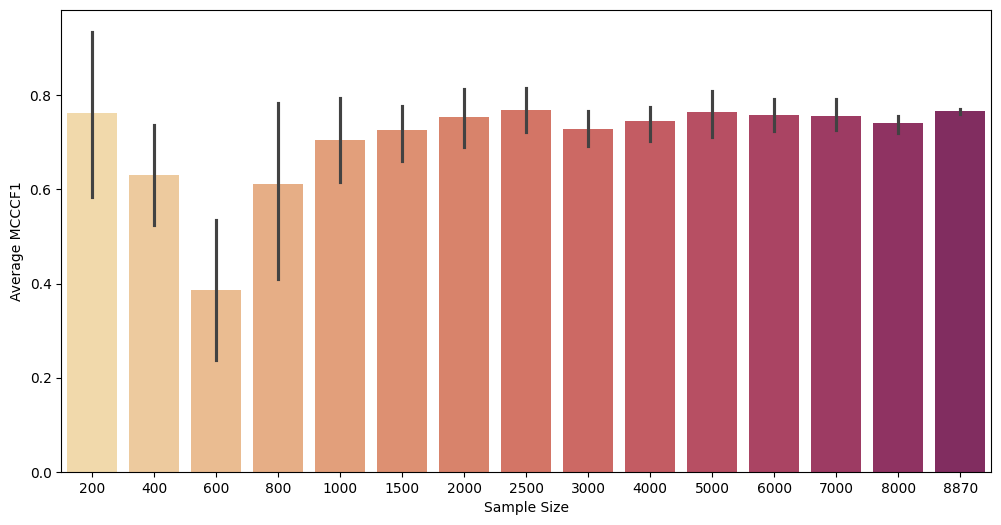

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import cmocean


plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=linePlotDf,
    x='Sample Size',
    y='MCCF1 Score',
    # hue='Data Window',
    palette=sns.color_palette("cmo.matter", n_colors=20),
    # height=6,
    # aspect=1.5,
    # lowess=True,
    # scatter_kws={"s": 0},
    )
ax.set(xlabel='Sample Size')
ax.set(ylabel='Average MCCCF1')
plt.show()

## Prepare data to build models

### Read the data matrix

In [17]:
import os
import pandas as pd


datamatrixDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/class_ratio_analysis/data_matrix_ratio_50_50.csv''')
datamatrixDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last,patientunitstayid,unitdischargeoffset,los_gt_seven_days,los_gt_fourteen_days
0,2772653,2865630,2014-10-22,2014-09-15,0,71.288732,56.685512,104.964664,18.684028,100.406250,...,29.800,3.0,16.2,134.0,24.0,14.700,2865630,152395,True,True
1,27168767,2731354,2014-11-09,2014-10-22,0,72.162704,54.948862,111.755155,17.843750,107.861111,...,29.200,14.5,14.6,272.0,27.0,13.000,2731354,38170,True,True
2,3033545,3045552,2015-08-22,2015-08-02,0,68.632514,44.074570,117.480009,18.448649,78.703540,...,29.500,7.7,19.1,152.0,26.0,9.000,3045552,33225,True,True
3,27197938,2782872,2015-10-31,2015-10-14,0,82.041459,61.029859,127.882776,19.881944,102.868056,...,26.500,10.0,22.3,231.0,26.0,12.300,2782872,28368,True,True
4,298584,3005819,2015-07-22,2015-07-11,0,82.890475,58.291465,133.300394,13.986111,78.513889,...,25.200,16.2,19.2,242.0,35.0,7.456,3005819,24914,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35427,1889797,1831462,2014-06-08,2014-06-07,0,70.143585,49.235234,121.644258,21.155660,80.174528,...,28.300,5.0,19.1,84.0,20.0,12.604,1831462,2490,False,False
35428,152115,1467466,2014-04-16,2014-04-14,0,116.238095,79.952381,181.047619,21.112024,87.175355,...,29.504,21.1,14.4,139.0,14.0,12.038,1467466,3944,False,False
35429,6150141,747931,2015-05-09,2015-05-08,0,102.231579,73.645614,152.224561,18.408451,82.116197,...,31.100,17.6,13.5,192.0,20.0,9.000,747931,3189,False,False
35430,27175533,2762839,2014-03-08,2014-03-08,0,108.717960,76.959887,160.516794,19.515038,83.917293,...,29.400,15.0,12.9,153.0,23.0,14.000,2762839,1501,False,False


### Create Test and Train Splits

In [9]:
from sklearn.model_selection import train_test_split


trainDf, testDf = train_test_split(datamatrixDf[['person_id', 'visit_occurrence_id']].drop_duplicates(), test_size=0.5, random_state=42)

trainDf.shape, testDf.shape

((4435, 2), (4436, 2))

In [10]:
dataMergedTrainDf = dataMergedDf.merge(trainDf, how='inner', on=['person_id', 'visit_occurrence_id'])
dataMergedTestDf = dataMergedDf.merge(testDf, how='inner', on=['person_id', 'visit_occurrence_id'])

dataMergedTrainDf.shape, dataMergedTestDf.shape

((17298, 131), (18134, 131))

In [11]:
dataMergedTrainDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix_train.csv', index=False)
dataMergedTestDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix_test.csv', index=False)

## Build a Model

In [18]:
import os


os.system(
    'cd ' + os.environ['EHR_ML_BASE'] + ';'
    +
    '''.venv/bin/python -m ehrml.ensemble.Build ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix_train.csv -tc "los_gt_fourteen_days" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb ''' + str(0) + ''' -wa ''' + str(8) + ''' -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/model/model_los_gt_fourteen_days_wb_0_wa_8.pkl;'''
    )


2023-12-13 20:10:03,067 - EHR-ML - INFO - Parsing command line arguments
2023-12-13 20:10:03,068 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix_train.csv
2023-12-13 20:10:03,068 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-12-13 20:10:03,068 - EHR-ML - INFO - args.target_column: los_gt_fourteen_days
2023-12-13 20:10:03,068 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-12-13 20:10:03,068 - EHR-ML - INFO - args.anchor_date_column: visit_start_date_adm
2023-12-13 20:10:03,068 - EHR-ML - INFO - args.window_before: 0
2023-12-13 20:10:03,068 - EHR-ML - INFO - args.window_after: 8
2023-12-13 20:10:03,068 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/model/model_los_gt_fourteen_days_wb_0_wa_8.pkl
2023-12-13 20:10:03,427 - EHR-ML - INFO - Split 

0

## Obtain predictions from the model

In [32]:
import os


os.system(
    'cd ' + os.environ['EHR_ML_BASE'] + ';'
    +
    '''.venv/bin/python -m ehrml.ensemble.Predict ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix_test.csv -tc "los_gt_fourteen_days" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb ''' + str(0) + ''' -wa ''' + str(1) + ''' -mp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/model/model_los_gt_fourteen_days_wb_0_wa_8.pkl -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/results/preds_los_gt_fourteen_days.csv;'''
    )


2023-12-13 20:37:29,439 - EHR-ML - INFO - Parsing command line arguments
2023-12-13 20:37:29,440 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix_test.csv
2023-12-13 20:37:29,440 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-12-13 20:37:29,440 - EHR-ML - INFO - args.target_column: los_gt_fourteen_days
2023-12-13 20:37:29,440 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-12-13 20:37:29,440 - EHR-ML - INFO - args.anchor_date_column: visit_start_date_adm
2023-12-13 20:37:29,440 - EHR-ML - INFO - args.window_before: 0
2023-12-13 20:37:29,441 - EHR-ML - INFO - args.window_after: 1
2023-12-13 20:37:29,441 - EHR-ML - INFO - args.model_path: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/model/model_los_gt_fourteen_days_wb_0_wa_8.pkl
2023-12-13 20:37:29,441 - EHR-ML - INFO - args.s

0

## Prediction Analysis

### Read predictions

In [33]:
import os
import pandas as pd


predsDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/results/preds_los_gt_fourteen_days.csv')
predsDf

,person_id,visit_occurrence_id,preds
0,65,751412,0.001982
1,319,3142123,0.001320
2,319,3142124,0.000045
3,327,3199203,0.000480
4,879,1015939,0.000055
...,...,...,...
3510,27214985,2883943,0.000054
3511,27215486,2677307,0.000168
3512,27215609,2676127,0.001528
3513,27215873,2791472,0.007834


In [34]:
resultsDf = predsDf.merge(datamatrixDf[['person_id', 'visit_occurrence_id', 'los_gt_fourteen_days']].drop_duplicates(), on=['person_id', 'visit_occurrence_id'])
resultsDf

,person_id,visit_occurrence_id,preds,los_gt_fourteen_days
0,65,751412,0.001982,False
1,319,3142123,0.001320,False
2,319,3142124,0.000045,False
3,327,3199203,0.000480,False
4,879,1015939,0.000055,False
...,...,...,...,...
3510,27214985,2883943,0.000054,False
3511,27215486,2677307,0.000168,False
3512,27215609,2676127,0.001528,False
3513,27215873,2791472,0.007834,False


### Prediction Distribution

/tmp/ipykernel_628282/4126068900.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDf.preds, hist=False, rug=False)


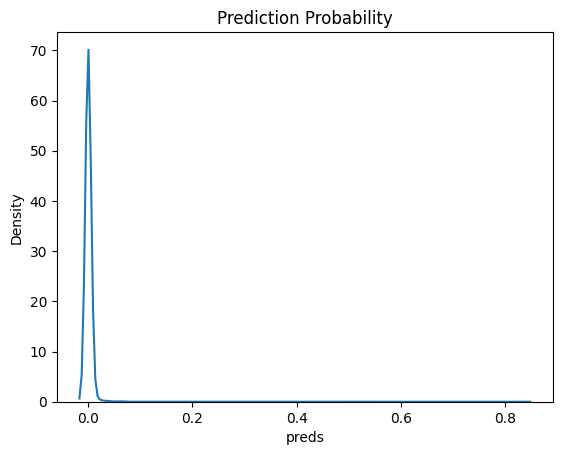

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.distplot(resultsDf.preds, hist=False, rug=False)
plt.title('Prediction Probability')
plt.show()

### Descriptive metrics

In [36]:
from sklearn.metrics import accuracy_score


print('LOS Greater than 14 days prediction accuracy: ', str(accuracy_score([ 0 if pred < 0.5 else 1 for pred in resultsDf.preds], resultsDf.los_gt_fourteen_days)))

LOS Greater than 14 days prediction accuracy:  0.8773826458036984


In [37]:
from sklearn.metrics import balanced_accuracy_score


print('LOS Greater than 14 days prediction balanced accuracy: ', str(balanced_accuracy_score([ 0 if pred < 0.5 else 1 for pred in resultsDf.preds], resultsDf.los_gt_fourteen_days)))

LOS Greater than 14 days prediction balanced accuracy:  0.7721146545178436


In [38]:
from sklearn.metrics import precision_score


print('LOS Greater than 14 days prediction average precision: ', str(precision_score([ 0 if pred < 0.5 else 1 for pred in resultsDf.preds], resultsDf.los_gt_fourteen_days)))

LOS Greater than 14 days prediction average precision:  0.004629629629629629


In [39]:
from sklearn.metrics import f1_score


print('LOS Greater than 14 days prediction F1: ', str(f1_score([ 0 if pred < 0.5 else 1 for pred in resultsDf.preds], resultsDf.los_gt_fourteen_days)))

LOS Greater than 14 days prediction F1:  0.009195402298850575


In [40]:
from sklearn.metrics import roc_auc_score


print('LOS Greater than 14 days prediction AUROC: ', str(roc_auc_score([ 0 if pred < 0.5 else 1 for pred in resultsDf.preds], resultsDf.los_gt_fourteen_days)))

LOS Greater than 14 days prediction AUROC:  0.7721146545178436


In [41]:
import os
import sys

sys.path.append(os.environ['EICU_EHR_PIPELINE_BASE'] + "/EHR-ML")


from ehrml.utils import MlUtils

print('LOS Greater than 14 days prediction MCC-F1: ', str(MlUtils.calculateMccF1([ 0 if pred < 0.5 else 1 for pred in resultsDf.preds], resultsDf.los_gt_fourteen_days)))

LOS Greater than 14 days prediction MCC-F1:  0.22280087442458096


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10), title='Confusion Matrix for the classifier'):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm_perc, annot=annot, fmt='', ax=ax, cmap='RdPu', annot_kws={"size":16})
    #plt.savefig(filename)
    plt.title(title)
    plt.show()


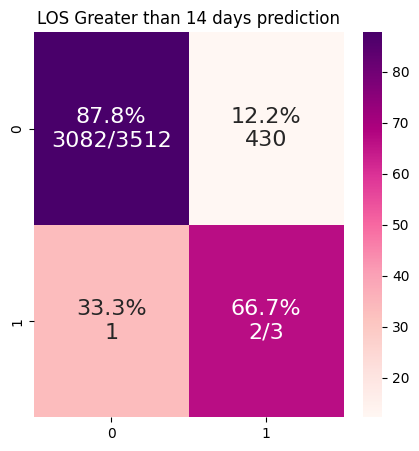

In [43]:
cm_analysis([ 0 if pred < 0.5 else 1 for pred in resultsDf.preds], resultsDf.los_gt_fourteen_days, [0, 1], ymap=None, figsize=(5, 5), title='LOS Greater than 14 days prediction')

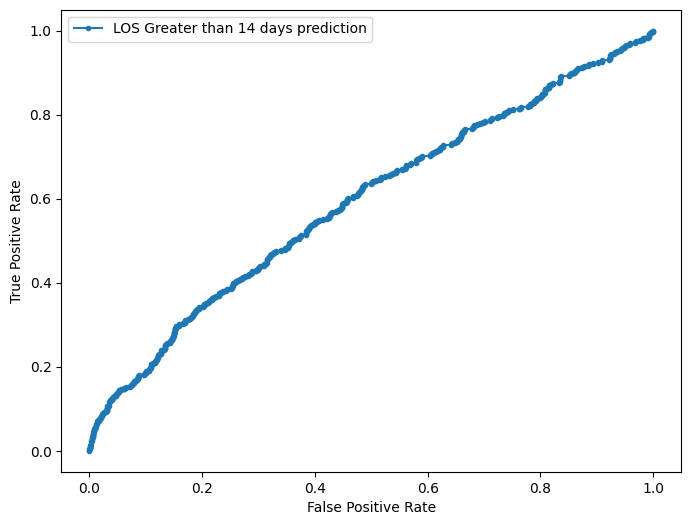

In [44]:
from sklearn.metrics import roc_curve


plt.figure(figsize=(8, 6))

fpr, tpr, _  = roc_curve(resultsDf.los_gt_fourteen_days, resultsDf.preds)
plt.plot(fpr, tpr, marker='.', label='LOS Greater than 14 days prediction')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
